C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


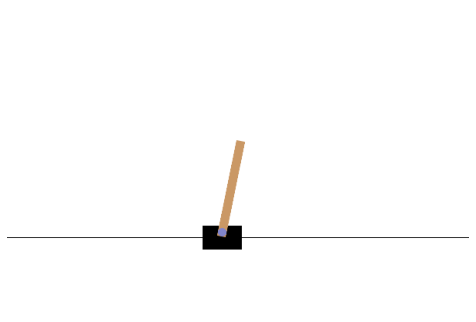

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from matplotlib import animation
from IPython.display import HTML

# アニメーション表示関数
def display_frames_as_gif(frames):
    fig = plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(fig, animate, frames=len(frames), interval=50)
    anim.save('movie_cartpole.mp4')  # 動画保存
    return HTML(anim.to_jshtml())    # Jupyterでインライン再生

# 環境初期化
env = gym.make('CartPole-v0', render_mode='rgb_array')
frames = []
observation, info = env.reset()

for step in range(200):
    frames.append(env.render())  # modeは不要
    action = np.random.choice(2)
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    if done:
        break

env.close()
display_frames_as_gif(frames)
